### Ejemplo de experimentación verificando la complejidad temporal

Primero podemos ver la correlación de nuestras medidas con la cota teórica que estimamos. Para esto usamos 

```
sns.lmplot
```

que hace una regresión lineal sobre las dos columnas que le pasamos.

Text(33.37500000000001, 0.5, 'tiempo (s)')

<Figure size 640x480 with 0 Axes>

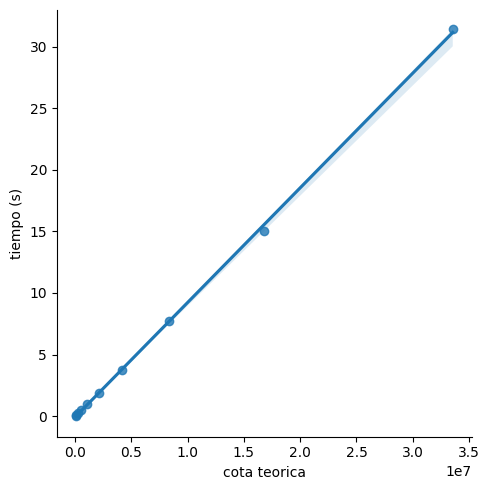

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Esto no es bueno hacerlo, porque no permite ver bien diferencias.
fig = plt.figure()

df = pd.read_csv("runtime_random.csv")
df['cota'] = df['n']

ax1 = sns.lmplot(x='cota', y='time', data=df)
plt.xlabel("cota teorica")
plt.ylabel("tiempo (s)")

Este gráfico tiene el problema de que los n que consideramos crecen exponencialmente. Podemos hacer el plot con escala logaritmica para que se vea mejor.

Text(30.640624999999993, 0.5, 'log_tiempo (s)')

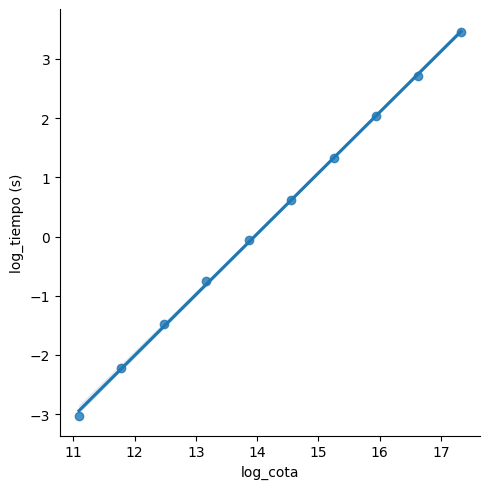

In [47]:
df['log_time'] = np.log(df['time'])
df['log_cota'] = np.log(df['cota'])
ax1 = sns.lmplot(x='log_cota', y='log_time', data=df)
plt.xlabel("log_cota")
plt.ylabel("log_tiempo (s)")

Incluso podemos calcular el coeficiente de Pearson, que es una medida de dependencia lineal entre variables. Mientras más cerca esté de 1, más confianza tenemos de que nuestras variables están linealmente correlacionadas.

In [48]:
r = np.corrcoef(df['log_cota'], df['log_time'])[0, 1];
print("El coeficiente de correlación de Pearson es: r="+str(r))

El coeficiente de correlación de Pearson es: r=0.9998032133669421


Con esto concluímos con un alto nivel de confianza que la cota teórica correlaciona con los tiempos de ejecución que vimos.

### Ejemplo de experimentación comparando familias de instancias

Vamos a hacer plots mostrando la diferencia de tiempo entre los dos casos que propusimos.

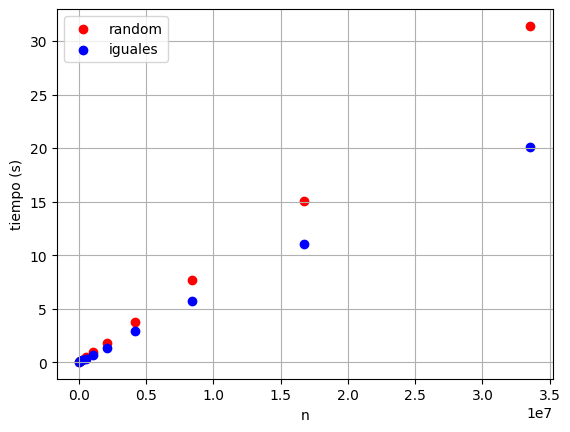

In [85]:
exp1 = "random"
exp2 = "iguales"

df = pd.read_csv(f"runtime_{exp1}.csv")
df[f'time_{exp1}'] = df['time']

df2 = pd.read_csv(f"runtime_{exp2}.csv")
df[f'time_{exp2}'] = df2['time']

fig, ax = plt.subplots()

ax.scatter(df['n'],df[f'time_{exp1}'],color='red', label=exp1)
ax.scatter(df['n'],df[f'time_{exp2}'],color='blue', label=exp2)
plt.xlabel("n")
plt.ylabel("tiempo (s)")

ax.legend()
ax.grid(True)

plt.show()

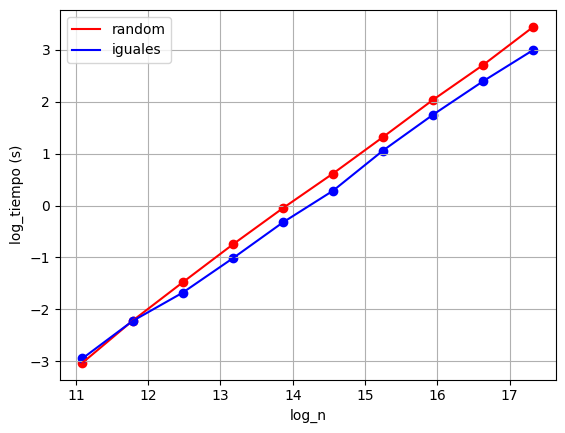

In [83]:
fig, ax = plt.subplots()

ax.scatter(np.log(df['n']),np.log(df[f'time_{exp1}']),color='red')
ax.plot(np.log(df['n']),np.log(df[f'time_{exp1}']),color='red', label=exp1)
ax.scatter(np.log(df['n']),np.log(df[f'time_{exp2}']),color='blue')
ax.plot(np.log(df['n']),np.log(df[f'time_{exp2}']),color='blue', label=exp2)

plt.xlabel("log_n")
plt.ylabel("log_tiempo (s)")

ax.legend()
ax.grid(True)

plt.show()

In [84]:
log_c = np.average(np.log(df[f'time_{exp1}']) - np.log(df[f'time_{exp2}']))
print("La constante entre ambos conjuntos de datos es c=" + str(np.exp(log_c)))

La constante entre ambos conjuntos de datos es c=1.258677666887953
